In [1]:
# Start by wrapping up last week's homework. 
# Look through some of the codingbat problems you struggled with

In [ ]:
# Fundamentals of Linear Regression:
# https://medium.com/datadriveninvestor/machine-learning-preface-ba69bca4701d
# When directed, go through 
# https://medium.com/datadriveninvestor/machine-learning-python-programming-introduction-for-business-people-10588e13ce9d

In [2]:
# Design your own custom problem set via random simulation
# Show that you can solve that problem set via ML and that the model
# can learn some of the ground truths of the simulation

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
n_data = 100
n_features = 30
x = np.random.rand(n_data, n_features)

feature_impacts = np.zeros(n_features)
feature_impacts[1] = 2
feature_impacts[5] = 5
feature_impacts[10] = -3
y = x.dot(feature_impacts)

In [18]:
# Check for the relationships we expect
# change to if 1 to see the relationships
if 0:
    for i in range(len(feature_impacts)):
        xi = x[:,i]
        print(i, np.corrcoef(xi, y)[0,1].round(1))

In [24]:
RegressionModel = Ridge().fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)

In [25]:
coefs[[1, 5, 10]]

array([ 1.86,  4.21, -2.65])

In [ ]:
# Show that if you reduced regularization, the model would learn the features more accurately

In [26]:
RegressionModel = Ridge(1e-10).fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)

In [28]:
coefs[[1, 5, 10]]

array([ 2.,  5., -3.])

In [ ]:
# Images are complex objects with structure. Lets pretend we need to solve a problem with images.
# We want to design a pickle detector, where a pickle is defined as any cell that is close to black
# Above three cells which are <red, blue, green>. An image is either True or False based on if 
# they have a pickle or not.
# Design a dataset to solve this problem, then train a model (using either numpy or tensorflow)
# That solves it.
# Over the following few weeks we will get tools that let us model structured problems
# like these much more efficiently.

In [42]:
n_image = 100
width = 10
images = np.random.rand(n_image, width, width, 3) / 2 + .25
y = np.random.randint(2, size = n_image)

In [43]:
for i, yi in enumerate(y):
    if yi:
        loc_x = np.random.randint(width-1)
        loc_y = np.random.randint(1, width-1)
        images[i, loc_x, loc_y,:] = 0
        images[i, loc_x+1, loc_y-1,:] = [1, 0, 0]
        images[i, loc_x+1, loc_y,:] = [0, 1, 0]
        images[i, loc_x+1, loc_y+1,:] = [0, 0, 1]

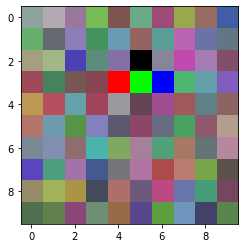

In [48]:
plt.imshow(images[y.argmax()])

In [50]:
# we have the dataset and it's visualized. now lets feed it into linear regression. 
# Let's just order all the values in this image in a line
images_line = images.reshape(images.shape[0], -1)

In [51]:
RegressionModel = Ridge().fit(images_line, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)
coefs

array([ 0.08,  0.04,  0.08, -0.19, -0.12, -0.03, -0.01,  0.  , -0.08,
        0.06, -0.16, -0.11, -0.1 , -0.12,  0.01,  0.01,  0.01, -0.07,
       -0.03, -0.04,  0.06, -0.24,  0.11,  0.02, -0.03, -0.02, -0.07,
       -0.1 ,  0.02,  0.12, -0.09, -0.1 ,  0.02,  0.01, -0.08, -0.22,
       -0.22, -0.04, -0.08, -0.07,  0.05,  0.25,  0.04, -0.02, -0.15,
       -0.12,  0.05,  0.01, -0.07,  0.05, -0.09,  0.02, -0.18,  0.03,
       -0.09, -0.03,  0.01,  0.06,  0.03,  0.06,  0.06, -0.01,  0.05,
       -0.08, -0.17, -0.09,  0.06, -0.08, -0.02,  0.05, -0.03,  0.02,
        0.13, -0.16,  0.04, -0.03, -0.11, -0.16, -0.06,  0.05, -0.18,
       -0.11, -0.12, -0.14, -0.16,  0.02, -0.05,  0.05, -0.02, -0.03,
        0.02, -0.16,  0.1 ,  0.08, -0.12,  0.02,  0.04,  0.09, -0.05,
        0.05, -0.12, -0.09,  0.03, -0.25,  0.02, -0.04,  0.08, -0.09,
       -0.15, -0.08, -0.  , -0.07, -0.13, -0.04, -0.13,  0.08, -0.16,
        0.08, -0.03, -0.02,  0.12, -0.11, -0.08, -0.09,  0.01, -0.  ,
       -0.04, -0.05,